# OpenET Pilot Study Workflow Example

First presented at TPS GIS Roundtable Meeting 2/20/25 by Hannah Haugen

Do a complete run through on a sample set of fields. Which sample set?
Can I do ones for gold creek? or gold creek region?

Steps: visualize the example fields

run through everything happening in run_all

Add figures to help visualize process/print the resulting db tables.

Explain the current procedure? But place emphasis on api calls and integration.

Link to OpenET. 

What APIs are we using?

tada!

In [ ]:
## Import statements

# Outside packages
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import pyproj
from rasterstats import zonal_stats
from tqdm import tqdm
import sqlite3
from datetime import timedelta
from geopy import distance
from chmdata.thredds import GridMet
import matplotlib.pyplot as plt
import contextily as ctx
import cartopy.crs as ccrs

# Imports internal to project
os.chdir('C:/Users/CND571/PycharmProjects/openet')
from iwr.iwr_approx import iwr_daily_fm, iwr_database
from run.run_all import *

In [2]:
## Required Filepaths/Variable Names
main_dir = 'C:/Users/CND571/PycharmProjects/openet/examples'
# sqlite database table names
gm_ts, fields_db, results, etof_db = 'gridmet_ts', 'field_data', 'field_cu_results', 'opnt_etof'
irr_db, iwr_cu_db = 'irrmapper', 'static_iwr_results'
# irrmapper data
im_file = os.path.join(main_dir, 'irrmapper_ref_SID.csv')
# all openet etof data
etof_loc = os.path.join(main_dir, 'etof_files')  # loads all data
# Gridmet information
gm_d = 'F:/openet_pilot/gridmet'  # location of general gridmet files
gridmet_cent = os.path.join(gm_d, 'gridmet_centroids_MT.shp')
rasters_ = os.path.join(gm_d, 'correction_surfaces_aea')  # correction surfaces, one for each month and variable.
# define period of study (for gridmet fetching)
pos_start = '1987-01-01'
pos_end = '2023-12-31'
# location of IWR climate database
iwr_clim_loc = os.path.join(main_dir, 'IWR', 'climate.db')
iwr_coord_loc = os.path.join(main_dir, 'IWR', 'iwr_stations.geojson')
# iwr_clim_loc = 'C:/Users/CND571/Documents/IWR/Database/climate.db'

In [9]:
# Determine sample fields
fields = gpd.read_file(os.path.join(main_dir, 'gc12.shp'))
fields.head()

,FID,SOURCECODE,COUNTY_NO,COUNTYNAME,ITYPE,USAGE,MAPPEDBY,geometry
0,077_000017,MTDNRC,77,Powell,F,3.0,KH,"POLYGON ((-1295134.420 2736924.357, -1295113.5..."
1,077_000018,MTDNRC,77,Powell,F,3.0,KH,"POLYGON ((-1294881.949 2736421.143, -1294828.6..."
2,077_000019,MTDNRC,77,Powell,F,3.0,KH,"POLYGON ((-1293876.119 2736884.822, -1293832.6..."
3,077_000020,MTDNRC,77,Powell,F,3.0,KH,"POLYGON ((-1294563.293 2737041.462, -1294436.5..."
4,077_000038,MTDNRC,77,Powell,P,3.0,KH,"POLYGON ((-1294361.404 2736333.449, -1294353.1..."


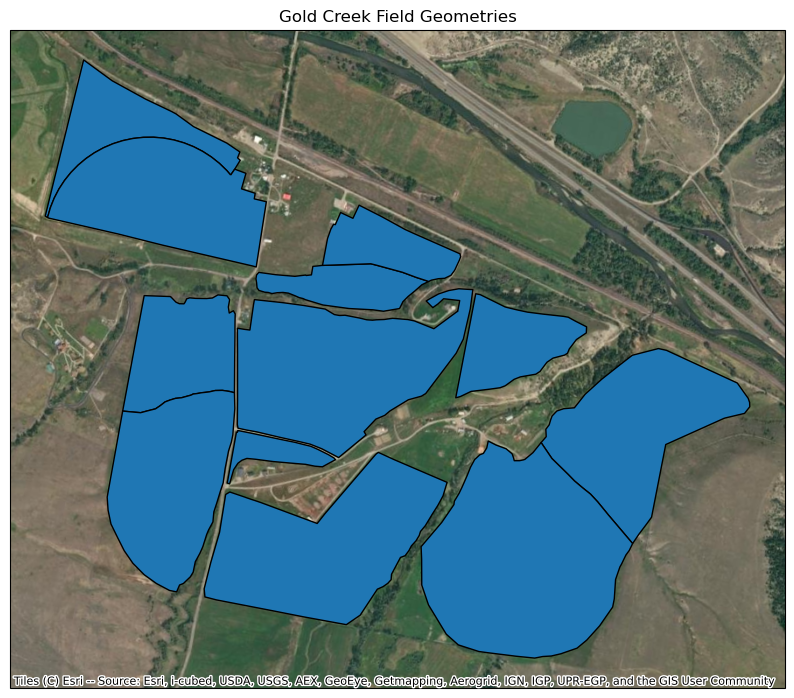

In [10]:
# Visualize sample fields
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.epsg(5071)})
fields.plot(ax=ax, edgecolor='black', transform=ccrs.epsg(5071))
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs=ccrs.epsg(5071))
plt.title('Gold Creek Field Geometries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Open/Create new database
conec = sqlite3.connect(os.path.join(main_dir, "opnt_analysis_example1.db"))

In [ ]:
# Initialize tables with correct column names/types/primary keys
init_db_tables(conec)



In [ ]:
# Finish/Close database things
cursor = conec.cursor()
cursor.execute("PRAGMA analysis_limit=500")
cursor.execute("PRAGMA optimize")
cursor.close()

conec.commit()
conec.close()